# DSP Python HW4

# Name: Kimia Mohsenian

# Student Number: 97110671

# Spring 2021

In [61]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from numpy import imag
import scipy.io

## Question 1

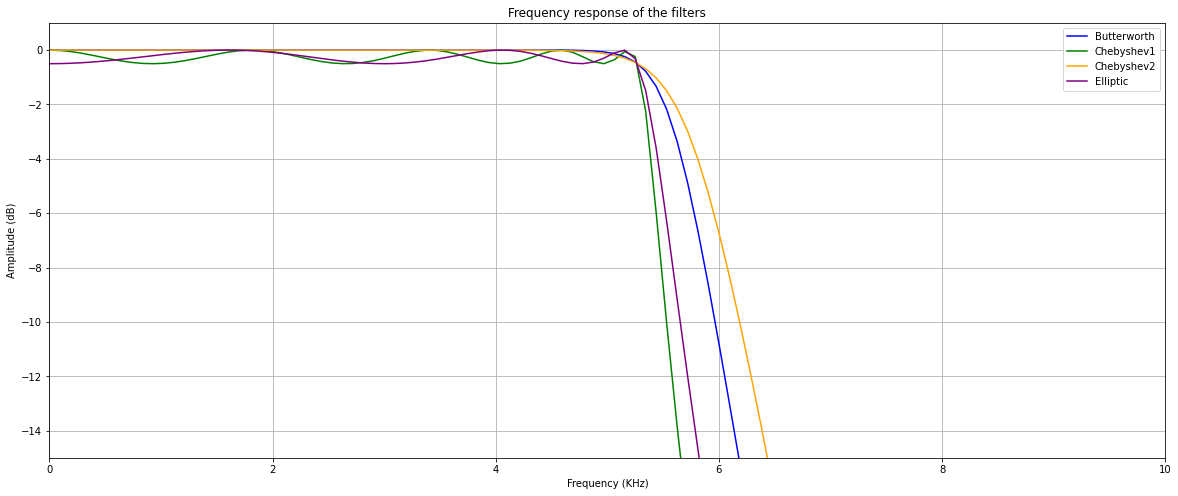

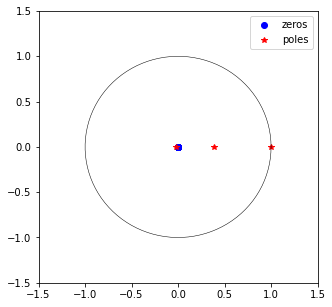

In [64]:
def pole_zero_plot(zeros, poles):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    
    teta = np.linspace(0,2*np.pi,100)
    
    for i in zeros:
        x1.append(i.real)
        y1.append(i.imag)
        
    for i in poles:
        x2.append(i.real)
        y2.append(i.imag)
    
    x3 = np.cos(teta)
    y3 = np.sin(teta)
    
    
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(5)
    fig.set_figheight(5)
    plt.plot(x1, y1, 'o', color="blue" ,linewidth=1)
    plt.plot(x2, y2, '*', color="red",linewidth=0.5)
    plt.plot(x3, y3, color="black", linewidth=0.5)
    #ax.set_aspect('equal', adjustable='box')
    plt.legend(["zeros", "poles"])
    plt.ylim([-1.5, 1.5])
    plt.xlim([-1.5, 1.5])
    plt.show()

# ---------------------------------------------------------------------------

f_s = 48000                 # sampling frequency  
f_pass = 5000               # pass band frequency
f_stop = 8000               # stop band frequency 

passband_ripple = 0.5       # pass band ripple in db
stop_band_ripple = 60       # stop band ripple in db

blinear_coeff = 0.6

# bilinear mapping of edge frequencies
Td = 1
wp = (f_pass/(f_s/2))
ws = (f_stop/(f_s/2))
omega_p = (2/Td)*np.tan(wp/2)   # equivalent pass-band frequency in s domain 
omega_s = (2/Td)*np.tan(ws/2)   # equivalent stop-band frequency in s domain

# Butterworth
# calculating the corresponding Butterworth coefficients
N_butterworth, Wc_butterworth = signal.buttord(omega_p, omega_s, passband_ripple, stop_band_ripple, analog=True)  
# Designing the Butterworth filter using the obtained coefficients
b_butterworth, a_butterworth = signal.butter(N_butterworth, Wc_butterworth, 'low', analog=True)
# Using bilenear transformation to convert the analog filter to the digital filter
z_butterworth, p_butterworth = signal.bilinear(b_butterworth, a_butterworth, blinear_coeff)
w_butterworth, h_butterworth = signal.freqz(z_butterworth, p_butterworth)

# Chebychev type I
# calculating the corresponding Chebychev type I coefficients
N_chebyshev1, Wc_chebyshev1 = signal.cheb1ord(omega_p, omega_s, passband_ripple, stop_band_ripple, analog=True)
# Designing the Chebychev type I filter using the obtained coefficients
b_chebyshev1, a_chebyshev1 = signal.cheby1(N_chebyshev1, passband_ripple, Wc_chebyshev1, 'low', analog=True)
# Using bilenear transformation to convert the analog filter to the digital filter
z_chebyshev1, p_chebyshev1 = signal.bilinear(b_chebyshev1, a_chebyshev1, blinear_coeff)
w_chebyshev1, h_chebyshev1 = signal.freqz(z_chebyshev1, p_chebyshev1, 512)


# Chebychev type II
# calculating the corresponding Chebychev type II coefficients
N_chebyshev2, Wc_chebyshev2 = signal.cheb2ord(omega_p, omega_s, passband_ripple, stop_band_ripple, analog=True)
# Designing the Chebychev type I filter using the obtained coefficients
b_chebyshev2, a_chebyshev2 = signal.cheby2(N_chebyshev2, stop_band_ripple, Wc_chebyshev2, 'low', analog=True)
# Using bilenear transformation to convert the analog filter to the digital filter
z_chebyshev2, p_chebyshev2 = signal.bilinear(b_chebyshev2, a_chebyshev2, blinear_coeff)
w_chebyshev2, h_chebyshev2 = signal.freqz(z_chebyshev2, p_chebyshev2, 512)

# elliptic
# calculating the corresponding Chebychev type II coefficients
N_elliptic, Wc_elliptic = signal.ellipord(omega_p, omega_s, passband_ripple, stop_band_ripple, analog=True)
# Designing the Chebychev type I filter using the obtained coefficients
b_elliptic, a_elliptic = signal.ellip(N_elliptic, passband_ripple, stop_band_ripple, Wc_elliptic, 'low', analog=True)
# Using bilenear transformation to convert the analog filter to the digital filter
z_elliptic, p_elliptic = signal.bilinear(b_elliptic, a_elliptic, blinear_coeff)
w_elliptic, h_elliptic = signal.freqz(z_elliptic, p_elliptic, 512)


fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(8)
plt.plot(w_butterworth*f_s/np.pi/1000 , 20*np.log10(abs(h_butterworth)), 'b')
plt.plot(w_chebyshev1*f_s/np.pi/1000 , 20*np.log10(abs(h_chebyshev1)), 'g')
plt.plot(w_chebyshev2*f_s/np.pi/1000 , 20*np.log10(abs(h_chebyshev2)), 'orange')
plt.plot(w_elliptic*f_s/np.pi/1000 , 20*np.log10(abs(h_elliptic)), 'purple')
plt.title('Frequency response of the filters')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Amplitude (dB)')
plt.grid(which='both', axis='both')
#plt.axvline(8, color='red')
#plt.axvline(5, color='red')
plt.ylim([-15, 1])
plt.xlim([0, 10])
plt.legend(["Butterworth", "Chebyshev1", "Chebyshev2", "Elliptic"])
plt.show()

# pole-zero plot of the Butterworth filter
pole_zero_plot(z_butterworth, p_butterworth)




## Question 3

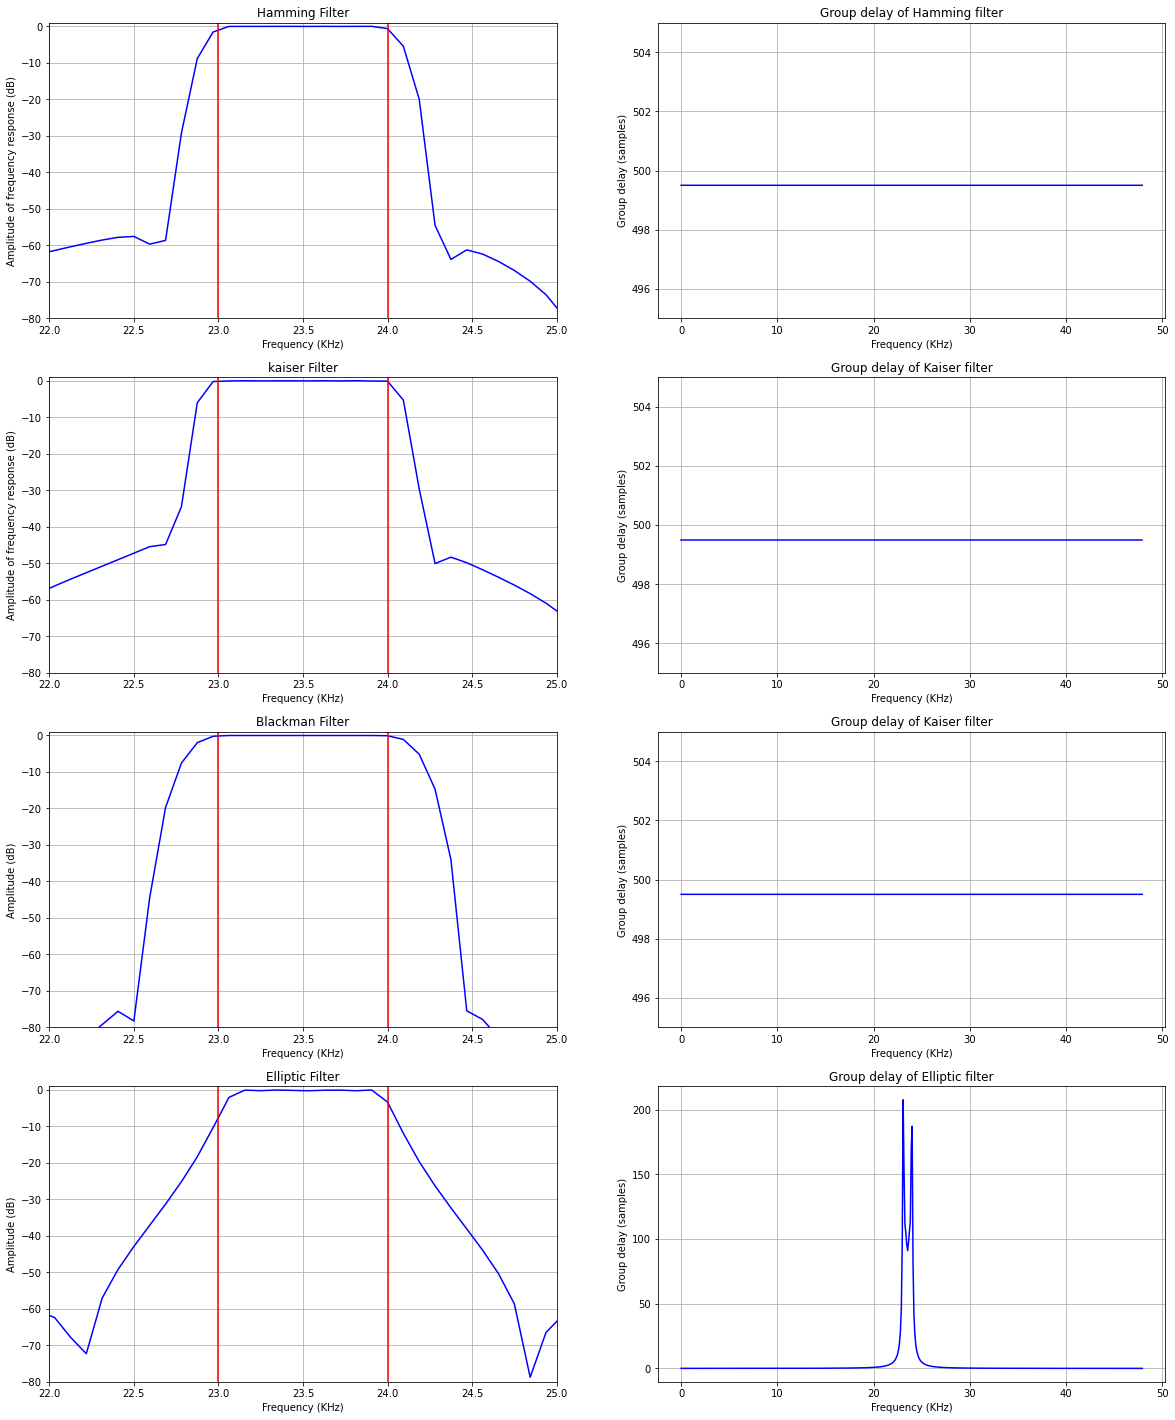

In [228]:
# sampling frequency
f_s = 96000

# filter specifications
passband_ripple = 0.2
stopband_ripple = 60
beta = 3
blinear_coeff = 0.687
filter_order = 1000
# edge frequencies
f_pass = [23000, 24000]
f_stop = [22000, 25500]
# edge frequencies in radian
w_pass = [f_pass[0]/fs/2, f_pass[1]/fs/2]
w_stop = [f_stop[0]/fs/2, f_stop[1]/fs/2]
# prewraping of edge frequencies using bilinear transformation
omega_pass = [(2/Td)*np.tan(w_pass[0]/2), (2/Td)*np.tan(w_pass[1]/2)]
omega_stop = [(2/Td)*np.tan(w_stop[0]/2), (2/Td)*np.tan(w_stop[1]/2)]

# Hamming filter design
hamming_band = [22900, 24100]
hamming_filter = signal.firwin(filter_order, hamming_band , window='hamming', pass_zero=False, fs=f_s)
w_hamming, h_hamming = signal.freqz(hamming_filter, 1)
w_hamming_gd, gd_hamming = signal.group_delay((hamming_filter, 1))
# Kaiser filter design
kaiser_band = [22875, 24100]
kaiser_filter = signal.firwin(filter_order, kaiser_band, window=('kaiser', beta), pass_zero=False, fs=f_s)
w_kaiser, h_kaiser = signal.freqz(kaiser_filter, 1)
w_kaiser_gd, gd_kaiser = signal.group_delay((kaiser_filter, 1))
# Blackman filter design
blackamn = [22800, 24200]
blackman_filter = signal.firwin(filter_order, blackamn, window='blackman', pass_zero=False, fs=f_s)
w_blackman, h_blackman = signal.freqz(blackman_filter, 1)
w_blackman_gd, gd_blackman = signal.group_delay((blackman_filter, 1))
# Elliptic filter design
N_elliptic, Wc_elliptic = signal.ellipord(omega_pass, omega_stop, passband_ripple, stopband_ripple, analog=True)
b_elliptic, a_elliptic = signal.ellip(N_elliptic, passband_ripple, stopband_ripple, Wc_elliptic, 'bandpass', analog=True)
z_elliptic, p_elliptic = signal.bilinear(b_elliptic, a_elliptic, blinear_coeff)
w_elliptic, h_elliptic = signal.freqz(z_elliptic, p_elliptic, 512)
w_elliptic_gd, gd_elliptic = signal.group_delay((z_elliptic, p_elliptic))


# plotting
fig, ax = plt.subplots(4, 2)
fig.set_figwidth(20)
fig.set_figheight(25)

# plotting of Hamming filter
ax[0][0].set_title('Hamming Filter')
ax[0][0].plot(w_hamming * f_s / 2 / np.pi / 1000 , 20 * np.log10(abs(h_hamming)), 'b')
ax[0][0].axvline(23, color='r')
ax[0][0].axvline(24, color='r')
ax[0][0].set_ylabel('Amplitude of frequency response (dB)')
ax[0][0].set_xlabel('Frequency (KHz)')
ax[0][0].set_xlim([22, 25])
ax[0][0].set_ylim([-80, 1])
ax[0][0].grid(which='both', axis='both')
# plotting of Hamming filter group delay
ax[0][1].set_title('Group delay of Hamming filter')
ax[0][1].plot(w_hamming_gd * f_s / 2 / np.pi / 1000, gd_hamming, 'b')
ax[0][1].set_ylabel('Group delay (samples)')
ax[0][1].set_xlabel('Frequency (KHz)')
ax[0][1].grid(which='both', axis='both')
ax[0][1].set_ylim([(filter_order/2) - 5, (filter_order/2) + 5])
# plotting of Kaiser filter
ax[1][0].set_title('kaiser Filter')
ax[1][0].plot(w_kaiser * f_s / 2 / np.pi / 1000 , 20 * np.log10(abs(h_kaiser)), 'b')
ax[1][0].axvline(23, color='r')
ax[1][0].axvline(24, color='r')
ax[1][0].set_ylabel('Amplitude of frequency response (dB)')
ax[1][0].set_xlabel('Frequency (KHz)')
ax[1][0].set_xlim([22, 25])
ax[1][0].set_ylim([-80, 1])
ax[1][0].grid(which='both', axis='both')
# plotting of Kaiser filter group delay
ax[1][1].set_title('Group delay of Kaiser filter')
ax[1][1].plot(w_kaiser_gd * f_s / 2 / np.pi / 1000, gd_kaiser, 'b')
ax[1][1].set_ylabel('Group delay (samples)')
ax[1][1].set_xlabel('Frequency (KHz)')
ax[1][1].grid(which='both', axis='both')
ax[1][1].set_ylim([(filter_order/2) - 5, (filter_order/2) + 5])
# plotting of Blackman filter 
ax[2][0].set_title('Blackman Filter')
ax[2][0].plot(w_blackman * f_s / 2 / np.pi / 1000 , 20 * np.log10(abs(h_blackman)), 'b')
ax[2][0].axvline(23, color='r')
ax[2][0].axvline(24, color='r')
ax[2][0].set_ylabel('Amplitude (dB)')
ax[2][0].set_xlabel('Frequency (KHz)')
ax[2][0].set_xlim([22, 25])
ax[2][0].set_ylim([-80, 1])
ax[2][0].grid(which='both', axis='both')
# plotting of Blackman group delay
ax[2][1].set_title('Group delay of Kaiser filter')
ax[2][1].plot(w_blackman_gd * f_s / 2 / np.pi / 1000, gd_blackman, 'b')
ax[2][1].set_ylabel('Group delay (samples)')
ax[2][1].set_xlabel('Frequency (KHz)')
ax[2][1].grid(which='both', axis='both')
ax[2][1].set_ylim([(filter_order/2) - 5, (filter_order/2) + 5])
# plotting of Elliptic filter 
ax[3][0].set_title('Elliptic Filter')
ax[3][0].plot(w_elliptic * f_s / 2 / np.pi / 1000 , 20 * np.log10(abs(h_elliptic)), 'b')
ax[3][0].axvline(23, color='r')
ax[3][0].axvline(24, color='r')
ax[3][0].set_ylabel('Amplitude (dB)')
ax[3][0].set_xlabel('Frequency (KHz)')
ax[3][0].set_xlim([22, 25])
ax[3][0].set_ylim([-80, 1])
ax[3][0].grid(which='both', axis='both')
# plotting of Elliptic group delay
ax[3][1].set_title('Group delay of Elliptic filter')
ax[3][1].plot(w_elliptic_gd * f_s / 2 / np.pi / 1000, gd_elliptic, 'b')
ax[3][1].set_ylabel('Group delay (samples)')
ax[3][1].set_xlabel('Frequency (KHz)')
ax[3][1].grid(which='both', axis='both')




## Question 4

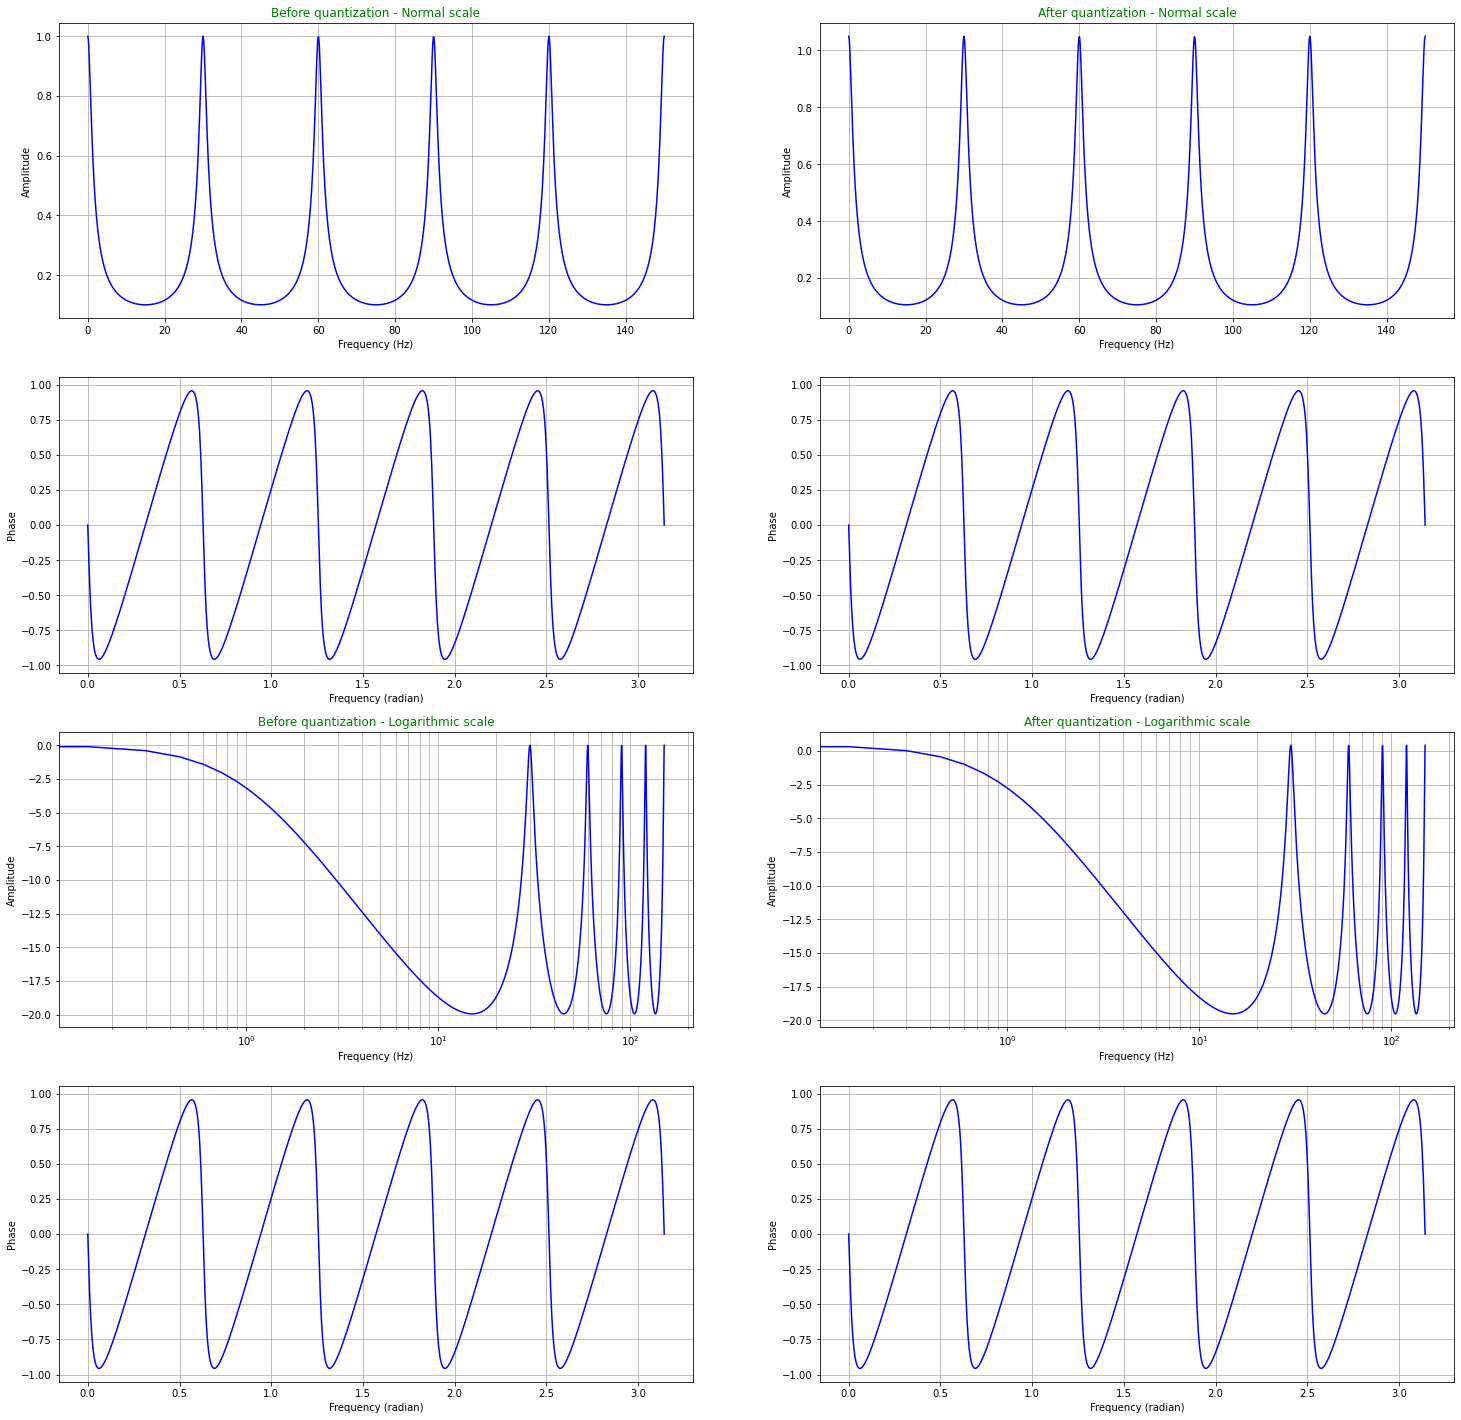

In [73]:
n = 10
r = 0.98
fs = 300
b0 = 1-(r**n)
coeffs = [b0, r**n]
# quantizing the coefficients with 4 bits
k = 2**4   # number of quantization levels
min_ = min(coeffs)
coeffs_q = coeffs + np.abs(min_)
# Normalizing to 0-1
max_ = max(coeffs_q)
coeffs_q = coeffs_q/max_
coeffs_q_4 = coeffs_q*k
coeffs_quantized_4bit = np.round(coeffs_q_4)
coeffs_quantized_4bit = coeffs_quantized_4bit/(max(coeffs_quantized_4bit))
coeffs_quantized_4bit = coeffs_quantized_4bit*max_
coeffs_quantized_4bit = coeffs_quantized_4bit - np.abs(min_)

# defining z-transforms

# before quantization
def H(z):
    num = coeffs[0]
    den = 1-coeffs[1]*(z**(-n))
    return num/den

# after quantization
def H_quantized(z):
    num = coeffs_quantized_4bit[0]
    den = (1-coeffs_quantized_4bit[1]*(z**(-n)))
    return num/den

w = np.linspace(0, np.pi, 1000)

# plotting
fig, ax = plt.subplots(4, 2)
fig.set_figwidth(25)
fig.set_figheight(25)

# normal scale
# before quantization
# amplitude
ax[0][0].plot(w*fs/np.pi/2, np.abs(H(np.exp(1j*w))),'b')
ax[0][0].set_title('Before quantization - Normal scale',color="green")
ax[0][0].set_ylabel('Amplitude')
ax[0][0].set_xlabel('Frequency (Hz)')
ax[0][0].grid(which='both', axis='both')
# phase
ax[1][0].plot(w, np.angle(H(np.exp(1j*w))),'b')
ax[1][0].set_ylabel('Phase')
ax[1][0].set_xlabel('Frequency (radian)')
ax[1][0].grid(which='both', axis='both')
# after quantization
ax[0][1].plot(w*fs/np.pi/2, np.abs(H_quantized(np.exp(1j*w))),'b')
ax[0][1].set_title('After quantization - Normal scale',color="green")
ax[0][1].set_ylabel('Amplitude')
ax[0][1].set_xlabel('Frequency (Hz)')
ax[0][1].grid(which='both', axis='both')
# phase
ax[1][1].plot(w, np.angle(H_quantized(np.exp(1j*w))),'b')
ax[1][1].set_ylabel('Phase')
ax[1][1].set_xlabel('Frequency (radian)')
ax[1][1].grid(which='both', axis='both')

# logarithmic scale
# before quantization
# amplitude
ax[2][0].plot(w*fs/np.pi/2, 20*np.log10(abs(H(np.exp(1j*w)))),'b')
ax[2][0].set_title('Before quantization - Logarithmic scale',color="green")
ax[2][0].set_ylabel('Amplitude')
ax[2][0].set_xlabel('Frequency (Hz)')
ax[2][0].grid(which='both', axis='both')
ax[2][0].set_xscale('log')
# phase
ax[3][0].plot(w, np.angle(H(np.exp(1j*w))),'b')
ax[3][0].set_ylabel('Phase')
ax[3][0].set_xlabel('Frequency (radian)')
ax[3][0].grid(which='both', axis='both')
# after quantization
# magnitude
ax[2][1].plot(w*fs/np.pi/2, 20*np.log10(abs(H_quantized(np.exp(1j*w)))),'b')
ax[2][1].set_title('After quantization - Logarithmic scale',color="green")
ax[2][1].set_ylabel('Amplitude')
ax[2][1].set_xlabel('Frequency (Hz)')
ax[2][1].grid(which='both', axis='both')
ax[2][1].set_xscale('log')
# phase
ax[3][1].plot(w, np.angle(H_quantized(np.exp(1j*w))),'b')
ax[3][1].set_ylabel('Phase')
ax[3][1].set_xlabel('Frequency (radian)')
ax[3][1].grid(which='both', axis='both')

plt.show()





## Quesstion 5

In [ ]:
# Question 5

# Specifications of Filter
f_sample = 8000            # sampling frequency  
f_pass = 3200               # pass band frequency
f_stop = 3800               # stop band frequency 
g_pass = 0.5                # pass band ripple
g_stop = 45                 # stop band attenuation

#
wp = f_pass/(f_sample/2)    # pass band freq in radian
ws = f_stop/(f_sample/2)    # stop band freq in radian
Td = 1                      # Sampling Time  
omega_p = wp / Td
omega_s = ws / Td


# Design of Filter using signal.cheb1ord
N_chebyshev1, Wc_chebyshev1 = signal.cheb1ord(omega_p, omega_s, g_pass, g_stop, analog=True)
#print('Chebyshev1:', "Order of the Filter is", N_chebyshev1, "and Cut-off frequency is {:.3f} Hz ".format(Wc_chebyshev1  * f_sample / 2))

# Chebyshev1
b_chebyshev1, a_chebyshev1 = signal.cheby1(N_chebyshev1, g_pass, Wc_chebyshev1, 'low', analog=True)
#z_chebyshev1, p_chebyshev1 = signal.bilinear(b_chebyshev1, a_chebyshev1, blinear_coeff)
w_chebyshev1, h_chebyshev1 = signal.freqz(b_chebyshev1, a_chebyshev1)



## Question 6

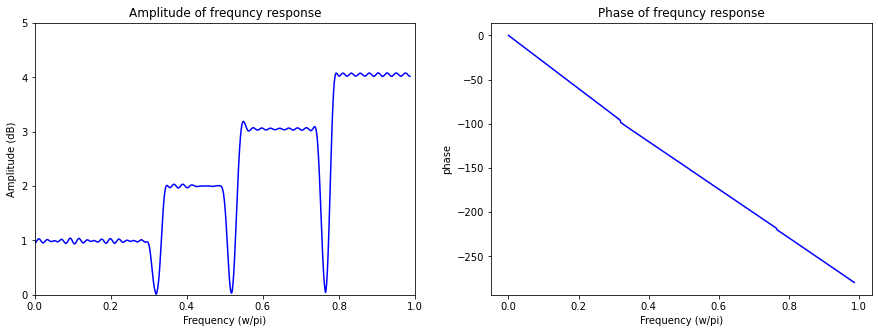

In [231]:
# low pass filter 
fs = 10000.0                                    # Sample rate, Hz
cutoff1 = 0.3*fs/2                              # Desired cutoff frequency, Hz
trans_width1 = ((0.35-0.3)/2)*fs/2              # Width of transition from pass band to stop band, Hz
numtaps1 = 170                                  # Size of the FIR filter
taps1 = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
w1, h1 = signal.freqz(taps, [1], worN=2000)


# first band-pass filter                         
band2 = [0.35*fs/2, 0.5*fs/2]                     # Desired pass band, Hz
trans_width2 = (0.05/2)*(fs/2)                    # Width of transition from pass band to stop band, Hz
numtaps2 = 170                                    # Size of the FIR filter.
edges2 = [0, band2[0] - trans_width2, band2[0], band2[1],
         band2[1] + trans_width2, 0.5*fs]
taps2 = signal.remez(numtaps2, edges2, [0, 1, 0], Hz=fs)
w2, h2 = signal.freqz(taps2, [1], worN=2000)

# second band-pass filter
band3 = [0.55*fs/2, 0.75*fs/2]                    # Desired pass band, Hz
trans_width3 = (0.05/2)*(fs/2)                    # Width of transition from pass band to stop band, Hz
numtaps3 = 170                                    # Size of the FIR filter.
edges3 = [0, band3[0] - trans_width3, band3[0], band3[1],
         band3[1] + trans_width3, 0.5*fs]
taps3 = signal.remez(numtaps3, edges3, [0, 1, 0], Hz=fs)
w3, h3 = signal.freqz(taps3, [1], worN=2000)

# high-pass filter
cutoff4 = 0.8*fs/2                                  # Desired cutoff frequency, Hz
trans_width4 = (0.05/2)*(fs/2)                      # Width of transition from pass band to stop band, Hz
numtaps4 = 171                                      # Size of the FIR filter.
taps4 = signal.remez(numtaps4, [0, cutoff4 - trans_width4, cutoff4, 0.5*fs],
                    [0, 1], Hz=fs)
w4, h4 = signal.freqz(taps4, [1], worN=2000)

# adding the four filters
w_t = w1 + w2 + w3 + w4
h_t = (h1)/1.01 + (h2)*2 + (h3)*3.05 + (h4)*4.05

# plotting
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(5)
# amplitude
ax[0].plot(w1*np.pi*0.1, abs(h_t),'b')
ax[0].set_ylim([0, 5])
ax[0].set_xlim([0, 1])
ax[0].set_xlabel('Frequency (w/pi)')
ax[0].set_ylabel('Amplitude (dB)')
ax[0].set_title('Amplitude of frequncy response')
plt.axvline(0.3, color='red')
plt.axvline(0.35, color='red')
plt.axvline(0.5, color='red')
plt.axvline(0.55, color='red')
plt.axvline(0.75, color='red')
plt.axvline(0.8, color='red')
# frequency
ax[1].plot(w1*np.pi*0.1, np.unwrap(np.angle(h_t)),'b')
#ax[1].set_ylim([0, 5])
#ax[1].set_xlim([0, 1])
ax[1].set_xlabel('Frequency (w/pi)')
ax[1].set_ylabel('phase')
ax[1].set_title('Phase of frequncy response')
plt.show()




